In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import SHMF, CSMF
import os

>>> Normalizing primordial power spectrum P(k)=(k/k_0)^n_s ...
    such that sigma(R=8Mpc/h) =   0.8000.
>>> Tabulating sigma(M,z=0) ...
    From now on, sigma(M,z) is computed by interpolation.
>>> Tabulating z(W) and z(t_lkbk)...
>>> Preparing output redshifts for merger trees ...
    Number of output redshifts =  354, up to z = 20.06
>>> Tabulating Parkinson+08 J(u_res) ...
>>> Building interpolation grid for Green+19 M(<r|f_b,c)...
>>> Building interpolation grid for Green+19 sigma(r|f_b,c)...
>>> Building interpolation grid for Green+19 d2Phidr2(r|f_b,c)...
>>> Building interpolator for Jiang+15 orbit sampler...


In [2]:
data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")

z = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

[3.09192474 3.22922371 3.36652268 3.50382164 3.64112061 3.77841958
 3.91571855 4.05301751 4.19031648 4.32761545 4.46491442 4.60221338
 4.73951235 4.87681132 5.01411029 5.15140925 5.28870822 5.42600719
 5.56330616 5.70060512 5.83790409 5.97520306 6.11250203 6.24980099
 6.38709996 6.52439893 6.6616979  6.79899687 6.93629583 7.0735948
 7.21089377 7.34819274 7.4854917  7.62279067 7.76008964 7.89738861
 8.03468757 8.17198654 8.30928551 8.44658448 8.58388344 8.72118241
 8.85848138 8.99578035 9.13307931 9.27037828 9.40767725 9.54497622
 9.68227518 9.81957415]


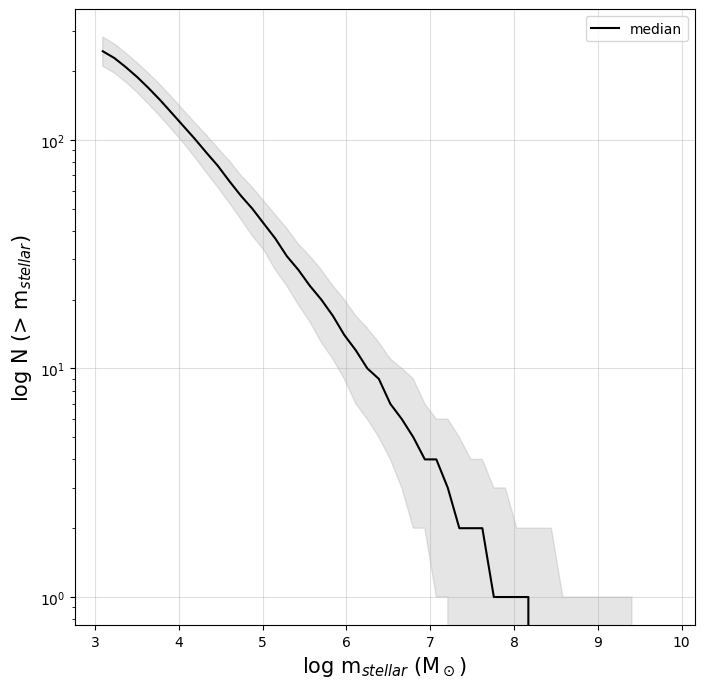

In [3]:
surv_massr, surv_CSMF = CSMF(data, shmr=1) # determinisitic

/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:118: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


[[       nan 4.73852478 5.4871686  ...        nan        nan        nan]
 [       nan 4.67108726 5.27316855 ...        nan        nan        nan]
 [       nan 5.92256404 5.4603124  ...        nan        nan        nan]
 ...
 [       nan 7.08567669 5.66397626 ...        nan        nan        nan]
 [       nan 4.73983861 6.1842664  ...        nan        nan        nan]
 [       nan 5.09586862 4.71354618 ...        nan        nan        nan]]
[ 3.11167385  3.25781554  3.40395723  3.55009891  3.6962406   3.84238229
  3.98852398  4.13466567  4.28080735  4.42694904  4.57309073  4.71923242
  4.86537411  5.0115158   5.15765748  5.30379917  5.44994086  5.59608255
  5.74222424  5.88836592  6.03450761  6.1806493   6.32679099  6.47293268
  6.61907436  6.76521605  6.91135774  7.05749943  7.20364112  7.3497828
  7.49592449  7.64206618  7.78820787  7.93434956  8.08049124  8.22663293
  8.37277462  8.51891631  8.665058    8.81119969  8.95734137  9.10348306
  9.24962475  9.39576644  9.54190813  9.688049

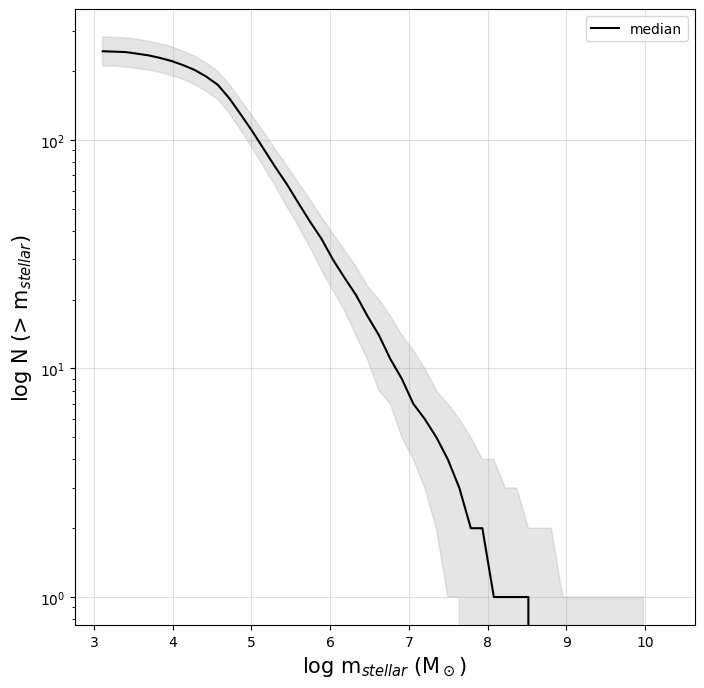

In [4]:
surv_massr_B, surv_CSMF_B = CSMF(data, shmr=3, red=z)

/Users/jsmonzon/Research/SatGen/notebooks/../src/galhalo.py:172: RuntimeWarning: overflow encountered in exp
  return delta*(np.log10(1.+np.exp(x)))**gamma/(1.+np.exp(10**(-x)))-\


[[       nan 3.01256072 4.05939252 ...        nan        nan        nan]
 [       nan 2.91825332 3.76024541 ...        nan        nan        nan]
 [       nan 4.66898714 4.0221421  ...        nan        nan        nan]
 ...
 [       nan 6.29832665 4.30722981 ...        nan        nan        nan]
 [       nan 3.01463483 5.03361188 ...        nan        nan        nan]
 [       nan 3.51241947 2.97771487 ...        nan        nan        nan]]
[ 2.88884395  3.03959437  3.19034478  3.3410952   3.49184561  3.64259603
  3.79334645  3.94409686  4.09484728  4.24559769  4.39634811  4.54709852
  4.69784894  4.84859935  4.99934977  5.15010018  5.3008506   5.45160101
  5.60235143  5.75310184  5.90385226  6.05460267  6.20535309  6.3561035
  6.50685392  6.65760433  6.80835475  6.95910516  7.10985558  7.26060599
  7.41135641  7.56210683  7.71285724  7.86360766  8.01435807  8.16510849
  8.3158589   8.46660932  8.61735973  8.76811015  8.91886056  9.06961098
  9.22036139  9.37111181  9.52186222  9.672612

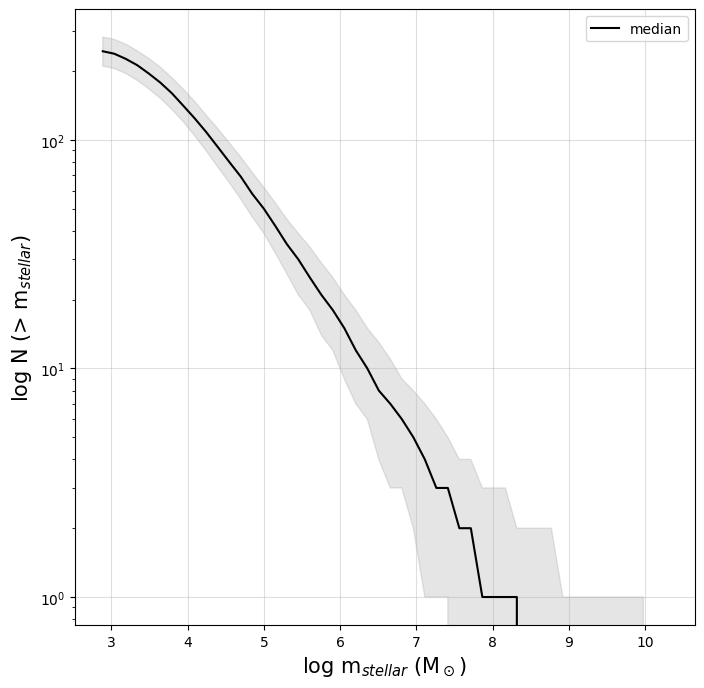

In [5]:
surv_massr_R, surv_CSMF_R = CSMF(data, shmr=4, red=z)

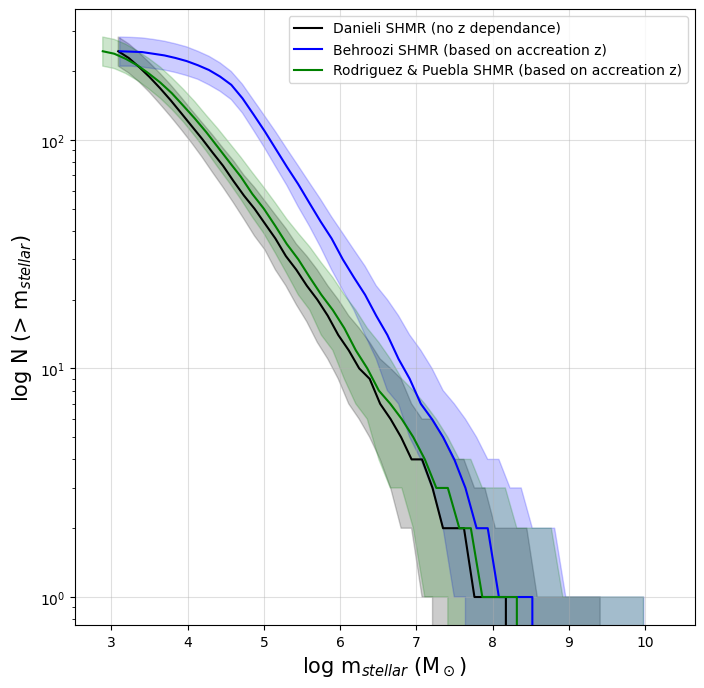

In [9]:
plt.figure(figsize=(8, 8))

plt.plot(surv_massr, surv_CSMF[1, :], label="Danieli SHMR (no z dependance)", color="black")
plt.fill_between(surv_massr, y1=surv_CSMF[0, :], y2=surv_CSMF[2, :], alpha=0.2, color="black")

plt.plot(surv_massr_B, surv_CSMF_B[1, :], label="Behroozi SHMR (based on accreation z)", color="blue")
plt.fill_between(surv_massr_B, y1=surv_CSMF_B[0, :], y2=surv_CSMF_B[2, :], alpha=0.2, color="blue")

plt.plot(surv_massr_R, surv_CSMF_R[1, :], label="Rodriguez & Puebla SHMR (based on accreation z)", color="green")
plt.fill_between(surv_massr_R, y1=surv_CSMF_R[0, :], y2=surv_CSMF_R[2, :], alpha=0.2, color="green")


plt.grid(alpha=0.4)
plt.yscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.legend()
plt.show()